In [233]:
# 대선자료 시각화

In [234]:
# 모듈 불러오기
import pandas as pd

In [235]:
# Data 불러오기
election=pd.read_csv('../Data/election_2022.csv')
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072


In [236]:
# 기본 통계량 확인하기 : 갯수, 평균, 표준편차, 1~4사분위수, 최대값 등등
election.describe()

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [237]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [238]:
# dimension 확인하기
election.shape

(248, 7)

In [239]:
# 컬럼별 자료형 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [240]:
# 전체컬럼에서 대해 NaN 확인
election.isnull().sum()
#election.isnull().any()

광역시도    0
시군구     0
선거인수    0
투표수     0
이재명     0
윤석열     0
심상정     0
dtype: int64

In [241]:
election['electionSum']= election.loc[:,'이재명':'심상정'].sum(axis=1)
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727


In [242]:
election.loc[:,'이재명':'심상정'].sum(axis=1)

0       98417
1       83460
2      149484
3      193656
4      230727
        ...  
243     24196
244     40112
245     30164
246    289786
247    109956
Length: 248, dtype: int64

In [243]:
election['electionRation']= round(election['electionSum'] / election['투표수'] * 100, 2 )
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [244]:
# csv 저장하기
election.to_csv("../Data/election_2022_1st.csv", index=False)

---
# 광역시별 투표율을 Pie Chart 만들기

In [245]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [246]:
elec_sum = election.pivot_table('투표수',index=['광역시도'], aggfunc='sum') 
 

In [247]:
elec_sum_order = elec_sum.sort_values(by='투표수', ascending=False)
elec_sum_order.head()

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504


In [248]:
import matplotlib.pyplot as plt

In [249]:
plt.style.use('default')

In [250]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

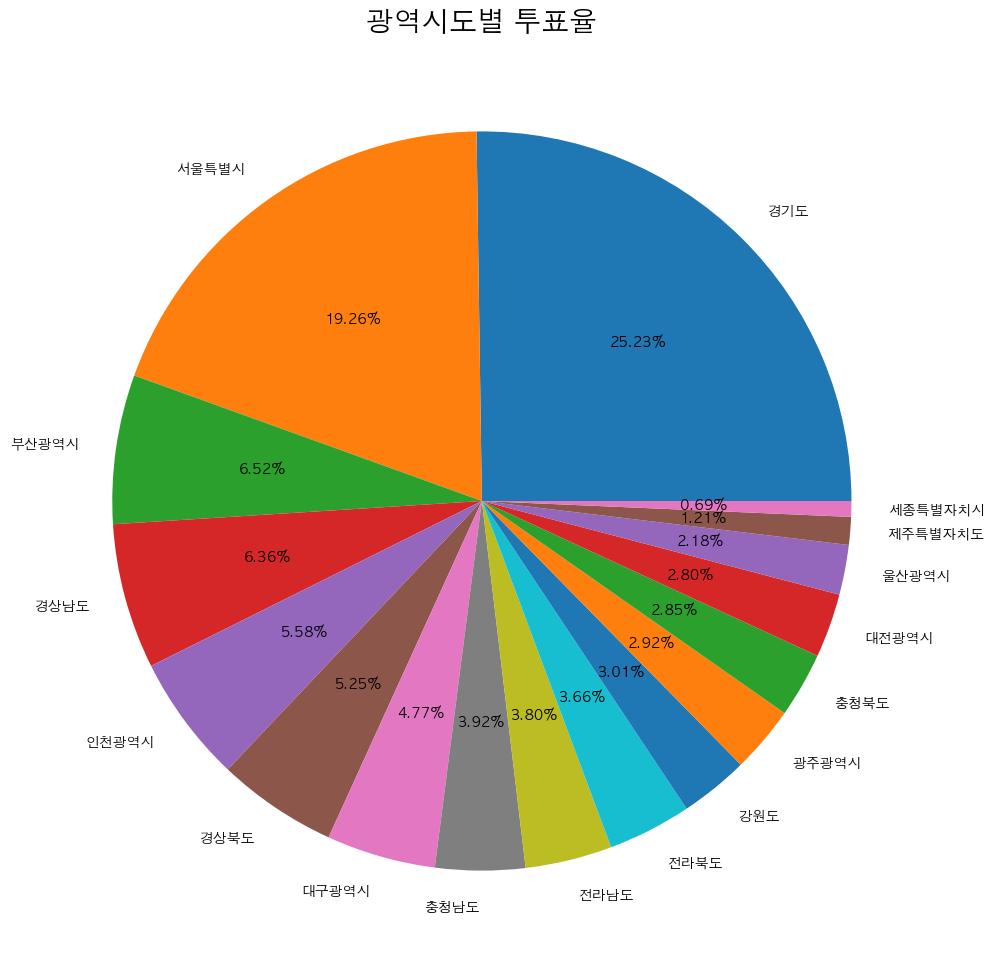

In [251]:
# 파이차트 그리기
data = elec_sum_order['투표수']
categories = list(elec_sum_order.index)

plt.rcParams['figure.figsize'] =(12,12)
plt.rcParams['font.size'] = 10

plt.pie(
    data,
    labels=categories,
    autopct="%.2f%%"
)
plt.title("광역시도별 투표율", fontsize =20)
plt.show()


---
# 윤석열 후보의 광역시별 득표율을 Pie Chart 만들기

In [252]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [253]:
y_sum = election.pivot_table(['윤석열'],index=['광역시도'], aggfunc='sum') 
y_sum

,윤석열
광역시도,
강원도,544980
경기도,3859666
경상남도,1237346
경상북도,1278922
광주광역시,124511
대구광역시,1199888
대전광역시,464060
부산광역시,1270072
서울특별시,3255747


In [254]:
y_sum_order = y_sum.sort_values(by='윤석열', ascending=False)
y_sum_order

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


In [255]:
y_sum_order

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


In [256]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

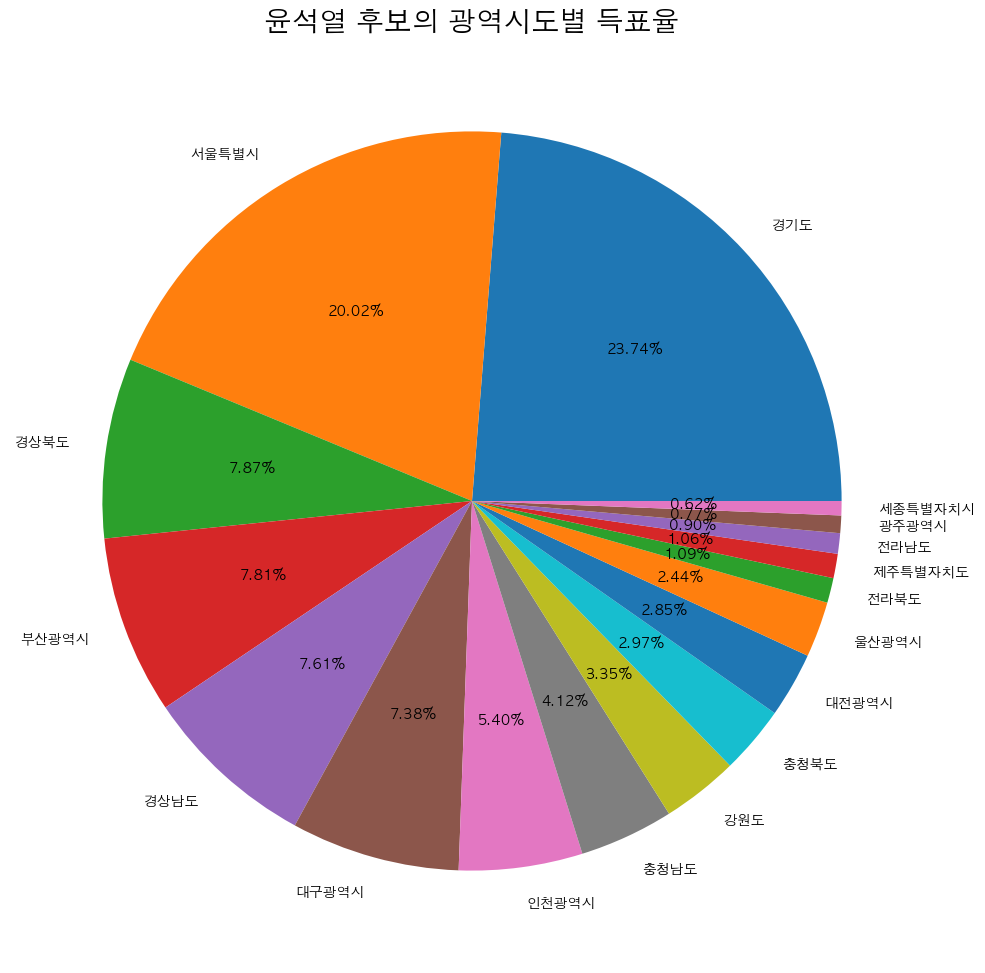

In [257]:
data = y_sum_order['윤석열']

plt.rcParams['figure.figsize'] =(12,12)
plt.rcParams['font.size'] = 10

plt.pie(
    data,
    labels = data.index,
    autopct="%.2f%%"
)
plt.title('윤석열 후보의 광역시도별 득표율', size = 20)
plt.show()

---
# 윤석열 후보의 서울 득표율 top5 Pie Chart 만들기

In [258]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99


In [259]:
seoul= election[election.loc[:,'광역시도'] =='서울특별시']
seoul_vote= seoul.loc[:,['시군구','윤석열']]
seoul_vote.head()

,시군구,윤석열
0,종로구,49172
1,중구,42906
2,용산구,85047
3,성동구,103880
4,광진구,113733


In [260]:
seoul_vote1 = seoul_vote.sort_values(by='윤석열', ascending=False)
seoul_vote1.iloc[5:,]
seoul_vote2= seoul_vote1.head(5)
seoul_vote2

,시군구,윤석열
23,송파구,255166
22,강남구,235897
15,강서구,181510
21,서초구,179472
10,노원구,163340


In [261]:
seoul_vote3 = seoul_vote2.pivot_table(['윤석열'],index=['시군구']) 
seoul_vote3

,윤석열
시군구,
강남구,235897
강서구,181510
노원구,163340
서초구,179472
송파구,255166


In [262]:
seoul_vote3.loc['기타',] = seoul_vote1.iloc[5:,1].sum()
seoul_vote3

,윤석열
시군구,
강남구,235897.0
강서구,181510.0
노원구,163340.0
서초구,179472.0
송파구,255166.0
기타,2240362.0


In [263]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

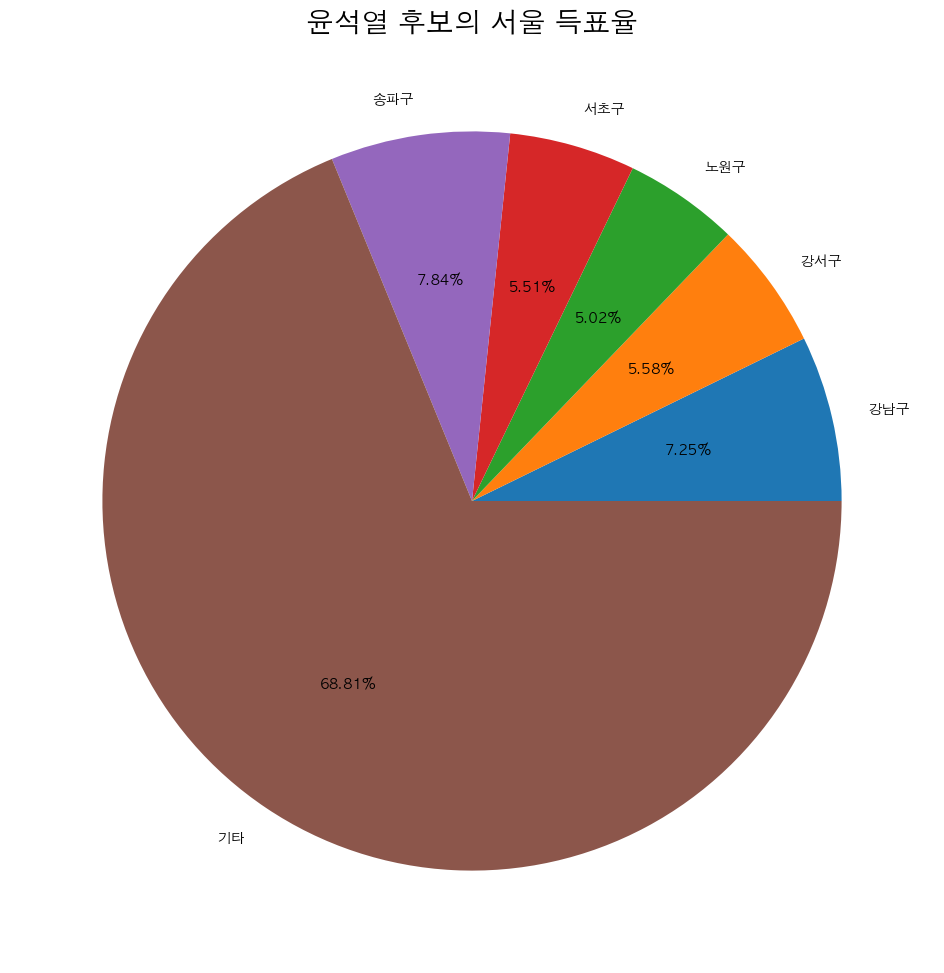

In [264]:
data = seoul_vote3['윤석열']
#categories = list(seoul_vote1.columns)
plt.rcParams['figure.figsize'] =(12,12)
plt.rcParams['font.size'] = 10

plt.pie(
    data,
    labels = seoul_vote3.index,
    autopct="%.2f%%"
)
plt.title('윤석열 후보의 서울 득표율', size = 20)
plt.show()

---
### 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울 특별시 성북구 분석하기

In [265]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [266]:
sung = election[election.loc[:,'시군구'] == '성북구']
sung

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [267]:
sung['기타'] = sung.투표수 - sung.electionSum
sung

/var/folders/51/xmc_l6t13wv1nc5z6qmyg58r0000gn/T/ipykernel_2825/846572841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sung['기타'] = sung.투표수 - sung.electionSum


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation,기타
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12,5489


In [268]:
sung1 = (sung.loc[:,['윤석열','이재명','심상정','기타']]).T
sung1
# sung2 = sung1.sort_values(by='7', ascending=False)

,7
윤석열,135044
이재명,142702
심상정,8952
기타,5489


In [269]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

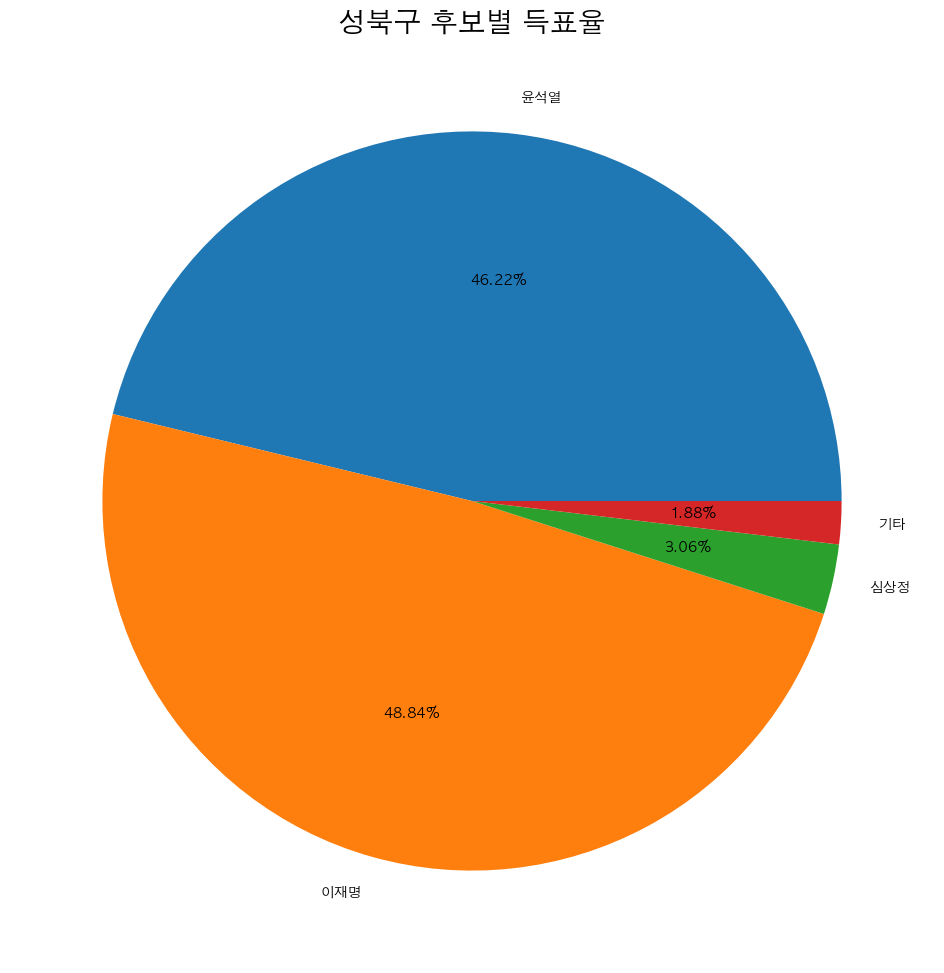

In [270]:
data = sung1[7]
#categories = list(seoul_vote1.columns)
plt.rcParams['figure.figsize'] =(12,12)
plt.rcParams['font.size'] = 10

plt.pie(
    data,
    labels = sung1.index,
    autopct="%.2f%%"
)
plt.title('성북구 후보별 득표율', size = 20)
plt.show()

---
### 대선주자 출생지별 득표율 분석
## 선생님 .ver
- 윤석열 후보의 출생지는 서울 특별시 성북구 분석하기


---
### 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 표현하기

In [366]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRation
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [359]:
voTe = election.pivot_table(['윤석열','이재명','심상정','투표수'],index=['광역시도'], aggfunc='sum') 

voTe


,심상정,윤석열,이재명,투표수
광역시도,,,,
강원도,25031,544980,419644,1015458
경기도,201113,3859666,4297931,8518854
경상남도,52591,1237346,794130,2146882
경상북도,33123,1278922,418371,1774284
광주광역시,14865,124511,830058,985492
대구광역시,31131,1199888,345045,1611512
대전광역시,25445,464060,434950,945308
부산광역시,47541,1270072,831896,2200224
서울특별시,180324,3255747,2944981,6501831


In [360]:
voTe1 = voTe.sort_values(by='투표수', ascending=False)
voTe1

,심상정,윤석열,이재명,투표수
광역시도,,,,
경기도,201113,3859666,4297931,8518854
서울특별시,180324,3255747,2944981,6501831
부산광역시,47541,1270072,831896,2200224
경상남도,52591,1237346,794130,2146882
인천광역시,51852,878560,913320,1883504
경상북도,33123,1278922,418371,1774284
대구광역시,31131,1199888,345045,1611512
충청남도,31789,670283,589991,1324660
전라남도,16279,145549,1094872,1282168


In [361]:
voTe2= voTe1.iloc[0:4,0:3]
voTe2=voTe2.loc[:,['윤석열','이재명','심상정']]


In [362]:
import seaborn as sns
import matplotlib.pylab as plt

In [363]:
sns.set_style('whitegrid')

In [364]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

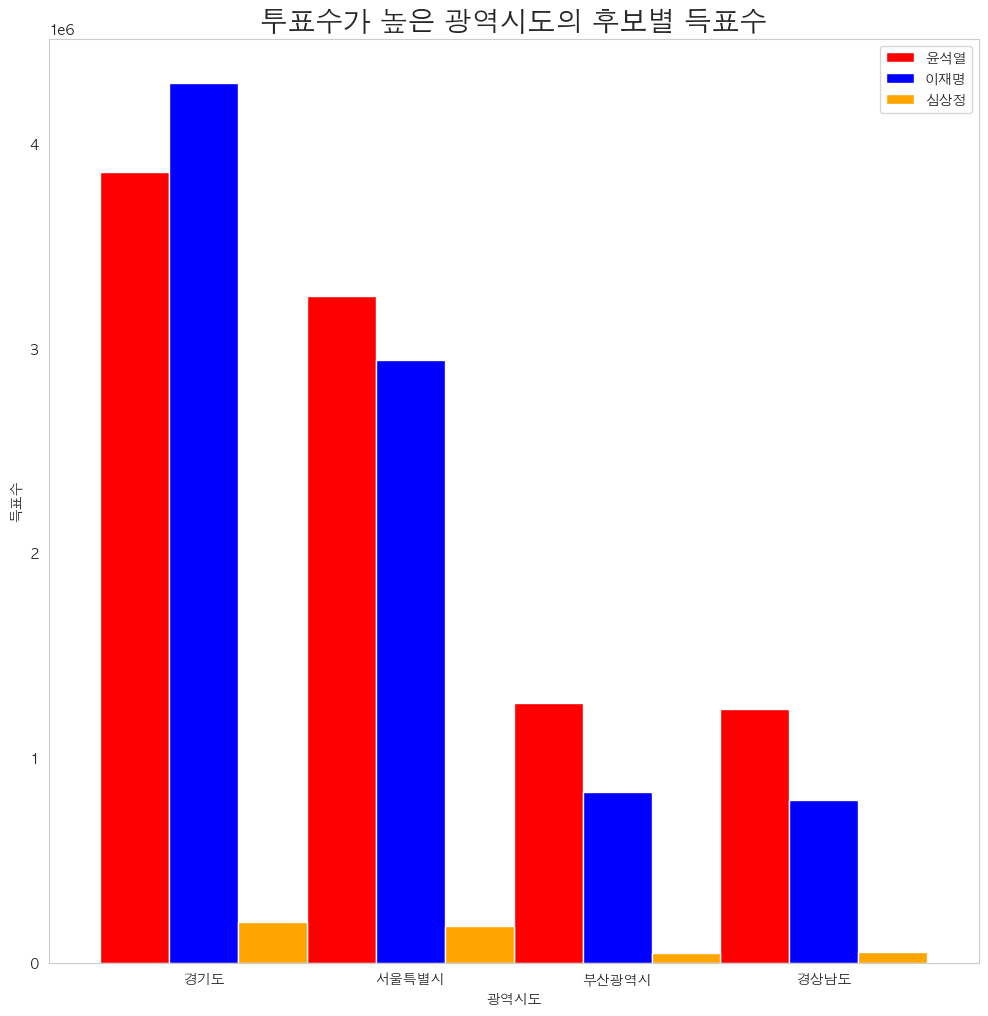

In [365]:
voTe2.plot(
    kind = 'bar',
    rot = 0,
    color =['red','blue','orange'],
    width = 1
)

plt.rcParams["font.size"] = 10
plt.title('투표수가 높은 광역시도의 후보별 득표수',size =20)
plt.xlabel('광역시도', size = 10)
plt.ylabel('득표수', size = 10)
plt.grid()


---
### 투표수가 높은 5군데 시군구의 후보별 득표수

In [344]:
elec_top5 = \
    election.sort_values(by='투표수',ascending=False)[0:5][['윤석열','이재명','심상정']].reset_index(drop=True)

In [345]:
elec_top5

,윤석열,이재명,심상정
0,236055,283324,12955
1,224331,285227,13249
2,203075,239179,10089
3,255166,180490,10652
4,181510,190000,11100


In [348]:
city = \
election.sort_values(by='투표수',ascending=False)[0:5]['광역시도']+" " + \
    election.sort_values(by='투표수',ascending=False)[0:5]['시군구']

In [349]:
elec_top5.index = city.reset_index(drop=True)
elec_top5

,윤석열,이재명,심상정
경기도 화성시,236055,283324,12955
경기도 부천시,224331,285227,13249
경기도 남양주시,203075,239179,10089
서울특별시 송파구,255166,180490,10652
서울특별시 강서구,181510,190000,11100


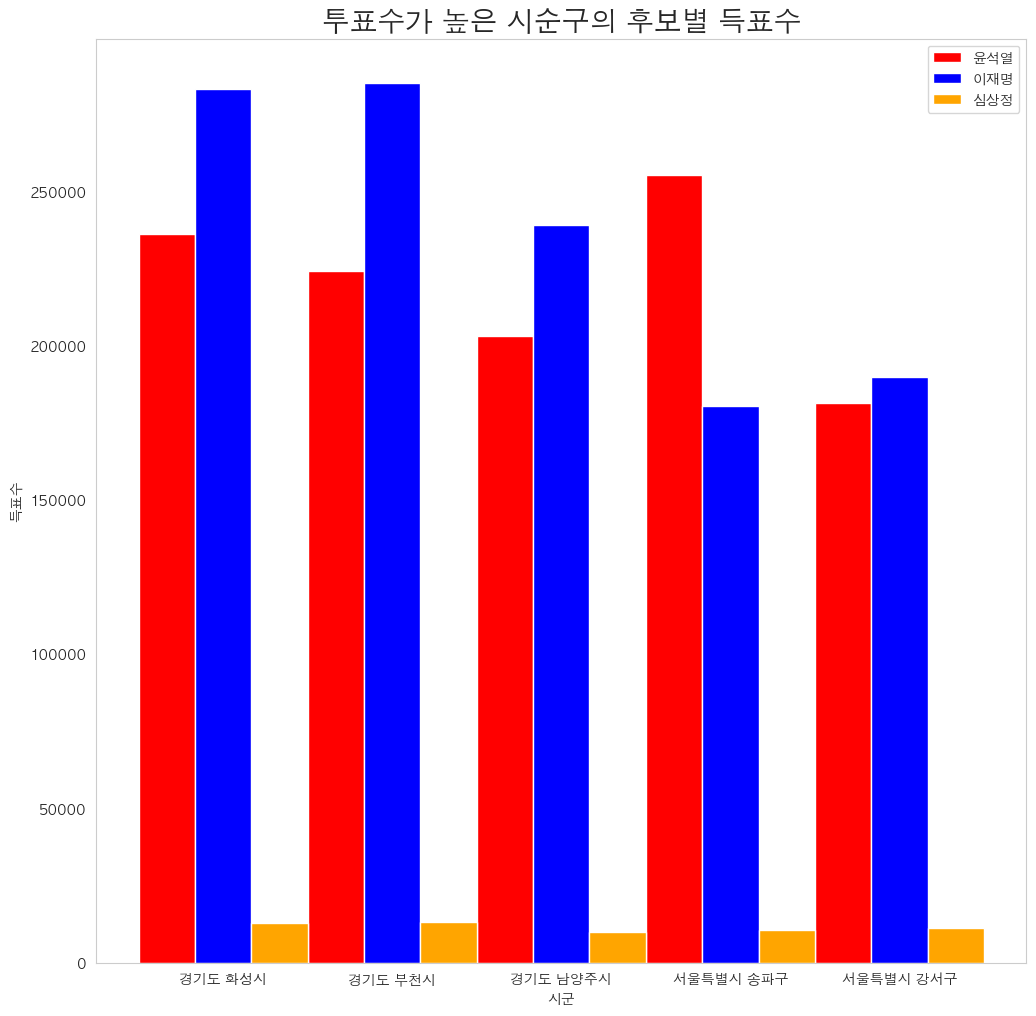

In [357]:
elec_top5.plot(
    kind = 'bar',
    rot = 0,
    color =['red','blue','orange'],
    width = 1
)

plt.rcParams["font.size"] = 10
plt.title('투표수가 높은 시군구의 후보별 득표수',size =20)
plt.xlabel('시군', size = 10)
plt.ylabel('득표수', size = 10)
plt.grid()
#plt.savefig("../Data/투표수가 노픈 시군구의 후보별 득표수.png")